In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from config import *

## Data

In [32]:
df = pd.read_excel(filename_all)
df = df[['Date', 'second']]

## Transformation

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week']  = df['Date'].dt.isocalendar().week
df['Day']   = df['Date'].dt.day
df['Dweek'] = df['Date'].dt.dayofweek

df['mnth_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['mnth_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 4)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 4)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

df['dweek_cos'] = np.cos(2 * np.pi * df['Dweek'] / 7)
df['dweek_sin'] = np.sin(2 * np.pi * df['Dweek'] / 7)

y = df['second']
y = LabelEncoder().fit_transform(y)
df['second'] = y

df = df[['mnth_cos', 'mnth_sin', 'week_cos', 'week_sin', 'day_cos', 'day_sin', 'dweek_cos', 'dweek_sin', 'second']]

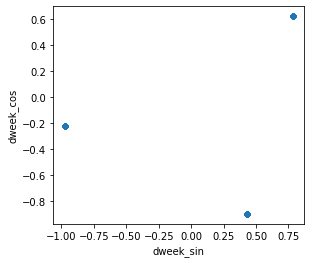

In [34]:
ax = df.plot.scatter('dweek_sin', 'dweek_cos').set_aspect('equal')

## Correlation

In [28]:
df.corr()

,mnth_cos,mnth_sin,week_cos,week_sin,day_cos,day_sin,dweek_cos,dweek_sin,second
mnth_cos,1.000000,0.003276,0.054007,0.030689,-0.009824,0.007055,0.000197,-0.004922,-0.018176
mnth_sin,0.003276,1.000000,-0.038615,0.049389,-0.012984,0.008856,-0.009010,-0.011618,-0.007278
week_cos,0.054007,-0.038615,1.000000,-0.000009,0.037826,-0.061409,0.008060,0.006186,0.002726
week_sin,0.030689,0.049389,-0.000009,1.000000,0.063455,0.034574,-0.007568,0.000652,-0.028754
day_cos,-0.009824,-0.012984,0.037826,0.063455,1.000000,-0.000853,-0.009748,0.130738,-0.012788
day_sin,0.007055,0.008856,-0.061409,0.034574,-0.000853,1.000000,-0.038713,0.010030,-0.003082
dweek_cos,0.000197,-0.009010,0.008060,-0.007568,-0.009748,-0.038713,1.000000,-0.003347,-0.004018
dweek_sin,-0.004922,-0.011618,0.006186,0.000652,0.130738,0.010030,-0.003347,1.000000,-0.026215
second,-0.018176,-0.007278,0.002726,-0.028754,-0.012788,-0.003082,-0.004018,-0.026215,1.000000


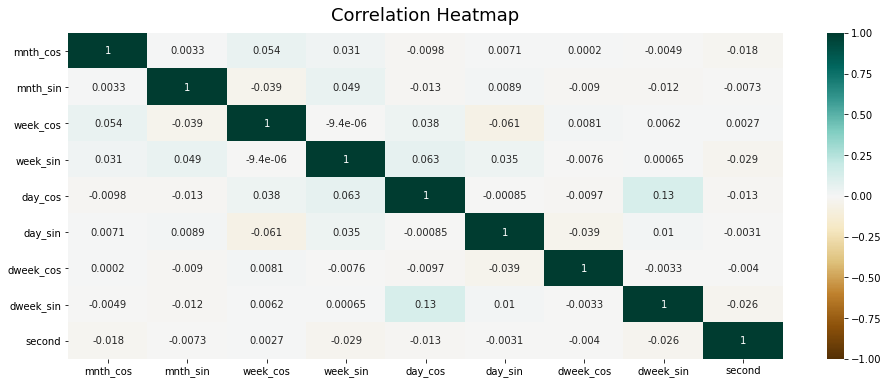

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

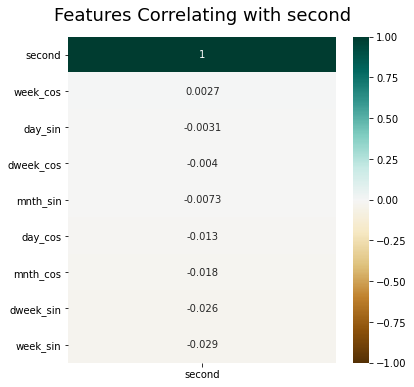

In [30]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['second']].sort_values(by='second', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with second', fontdict={'fontsize':18}, pad=16);

In [71]:
corr_df = df.corr()[['second']].sort_values(by='second', ascending=False)

In [81]:
type(corr_df.iloc[[1]].index.to_numpy())

numpy.ndarray

In [84]:
ind = corr_df.iloc[[1]].index.to_numpy()[0]